Load in the pandas library and load the dataset with the serpartor

In [5]:
import pandas as pd
import numpy as np

students_ds_math = pd.read_csv('./Dataset_Assignment_1/student-mat.csv', sep=';')
student_ds_portoguese = pd.read_csv('./Dataset_Assignment_1/student-por.csv', sep=';')

students_ds_math['course'] = 'math'
student_ds_portoguese['course'] = 'portoguese'
student_dataset = pd.concat([students_ds_math, student_ds_portoguese])

df = pd.DataFrame(student_dataset)

Check the first 5 rows of the dataset, to explore the dataset

In [6]:
data_top  = student_dataset.head(5)   

display(data_top)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


Check if the dataset has any missing values and print the number of missing values in each column

In [7]:
is_null = student_dataset.isnull()

if is_null.any().any():
    print("There are null values in the dataset")

Were about to convert the catergorical data in the dataset in to numerical data, make a check if all the list have numerical data to avoid errors when applying the decisions tree algorithm


In [8]:
average = student_dataset[['G1', 'G2', 'G3']].mean(axis=1)

student_dataset['pass'] = np.where(average >= 10, 1, 0)

student_converted_ds = pd.get_dummies(student_dataset)

df = pd.DataFrame(student_converted_ds)

Split  the  dataset  into  features  (independent  variables)  and  the  target  variable (pass/fail)

In [9]:
from sklearn.model_selection import train_test_split

X = student_converted_ds.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
y = student_converted_ds['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now were about to import the decision tree classifier from the sklearn library and fit the model with the features and target variables

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier(max_depth=4, random_state=42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [11]:
predictions = dtc.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.40      0.52        75
           1       0.73      0.92      0.81       134

    accuracy                           0.73       209
   macro avg       0.73      0.66      0.67       209
weighted avg       0.73      0.73      0.71       209



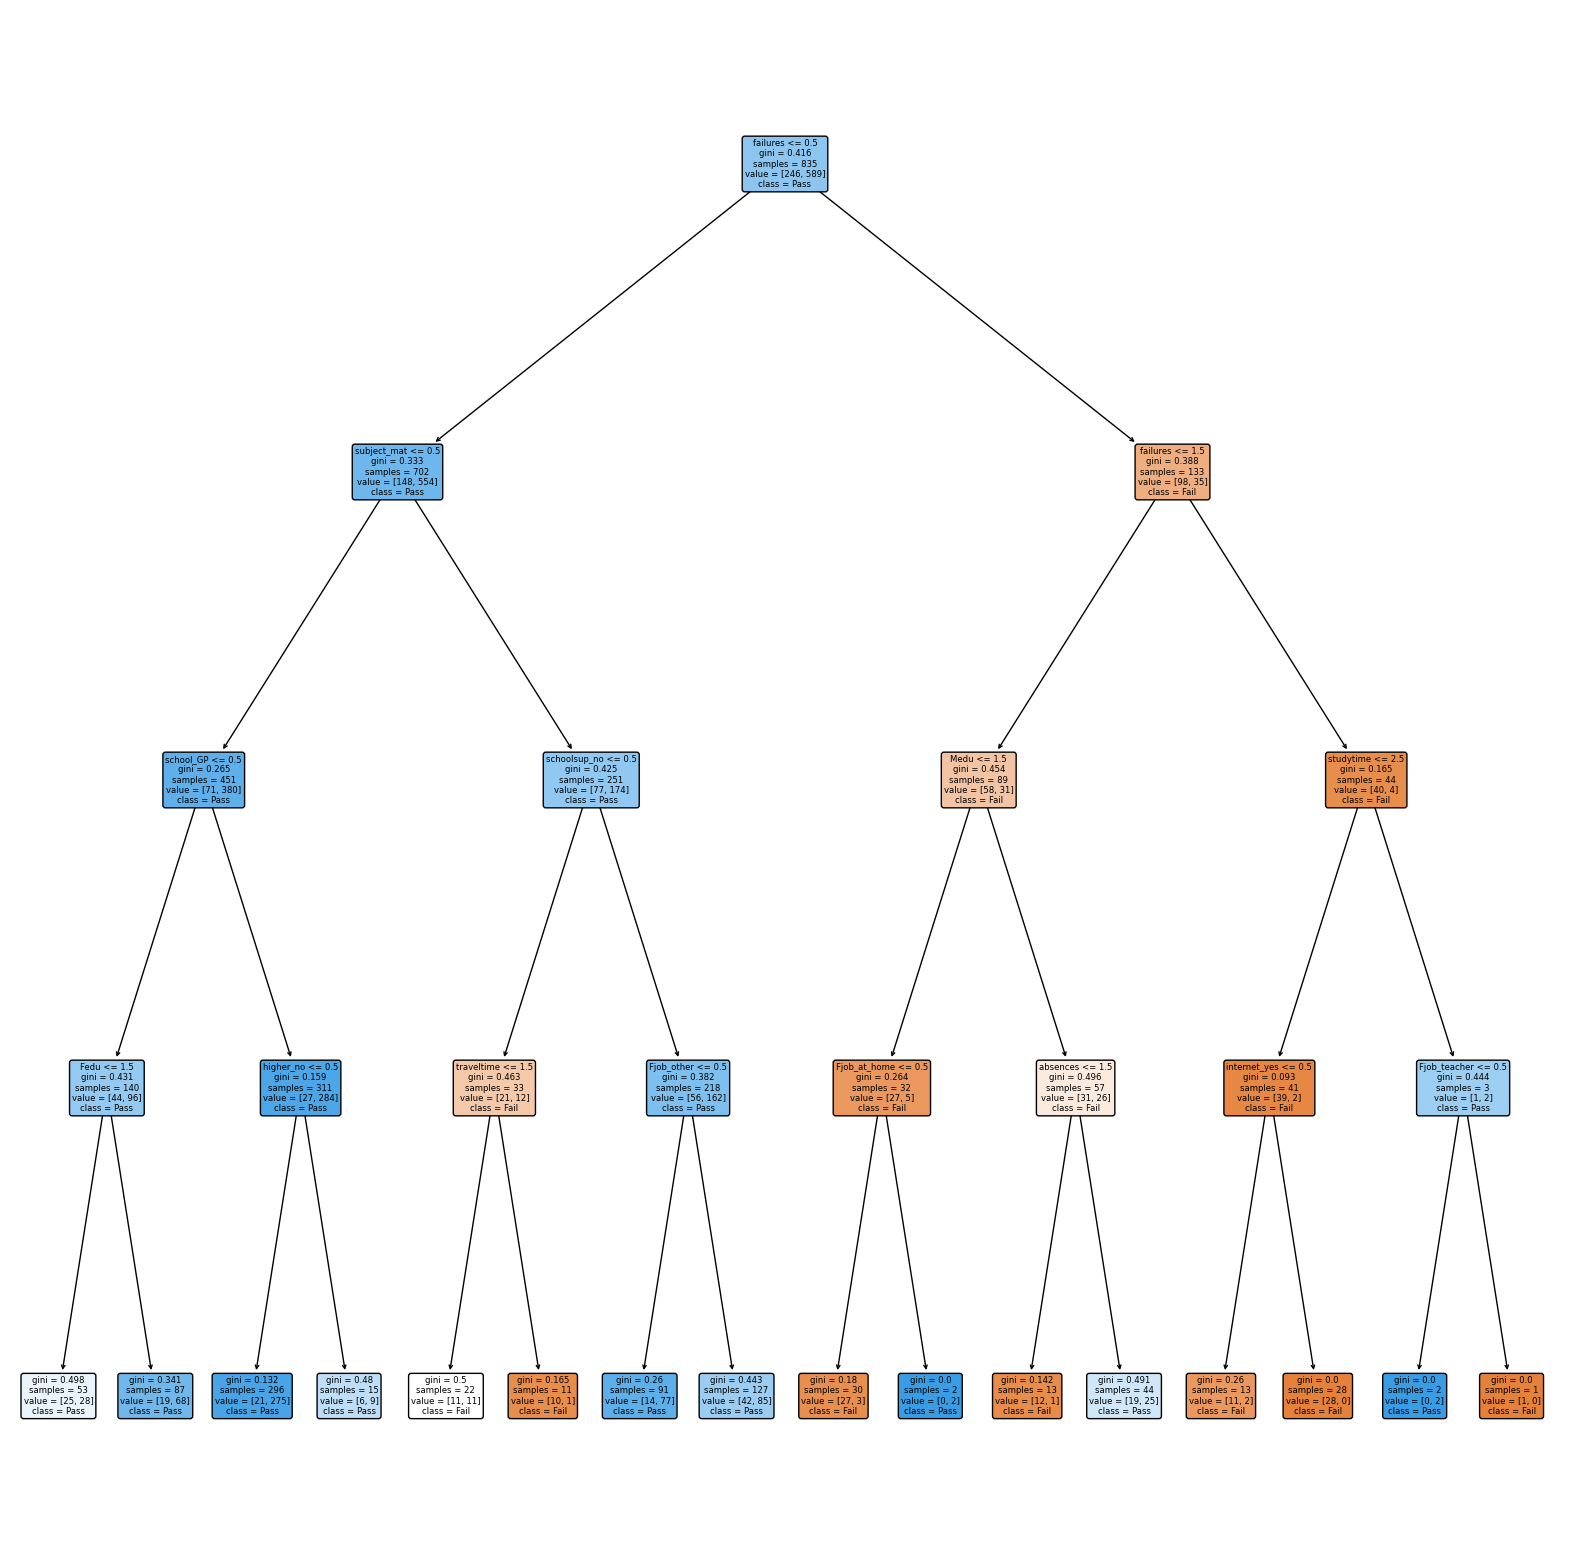

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print(classification_report(y_test, predictions))

plt.figure(figsize=(20,20))
plot_tree(dtc, filled=True, rounded=True, class_names=['Fail', 'Pass'], feature_names=X.columns)
plt.show()
